ANALISE ELEITORAL RJ
@joaomeirelles
jul/16

Carrega Bibliotecas

In [1]:
library(ggplot2)
library(ape)
library(ggplot2)
library(ggdendro)
library(reshape2)
library(corrplot)
library(plyr)

options(jupyter.plot_mimetypes = 'image/png')


In [2]:
#corrteste
cor.mtest <- function(mat, conf.level = 0.95) {
  mat <- as.matrix(mat)
  n <- ncol(mat)
  p.mat <- lowCI.mat <- uppCI.mat <- matrix(NA, n, n)
  diag(p.mat) <- 0
  diag(lowCI.mat) <- diag(uppCI.mat) <- 1
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      tmp <- cor.test(mat[, i], mat[, j], conf.level = conf.level)
      p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
      lowCI.mat[i, j] <- lowCI.mat[j, i] <- tmp$conf.int[1]
      uppCI.mat[i, j] <- uppCI.mat[j, i] <- tmp$conf.int[2]
    }
  }
  return(list(p.mat, lowCI.mat, uppCI.mat))
}

In [3]:
setwd('/home/jm/Documents/MFMF/analysis/rejoaosharedanotewithyoumfmfdata/vereadores/')

In [4]:
#load data
data_vereadores <- read.csv(file="data_vereadores.csv", head=TRUE, sep=",")
data_vereadores_cor <- data_vereadores[,3:ncol(data_vereadores)]
zona_secao_local <- read.csv(file="/home/jm/Documents/MFMF/analysis/granja/MF/zona_local_secao.csv", head=TRUE, sep=",")


In [5]:
###merge##
a <- merge(zona_secao_local[,c(1,2,3,6,11,12,13,14)], data_vereadores, by=c("zona","secao")) 

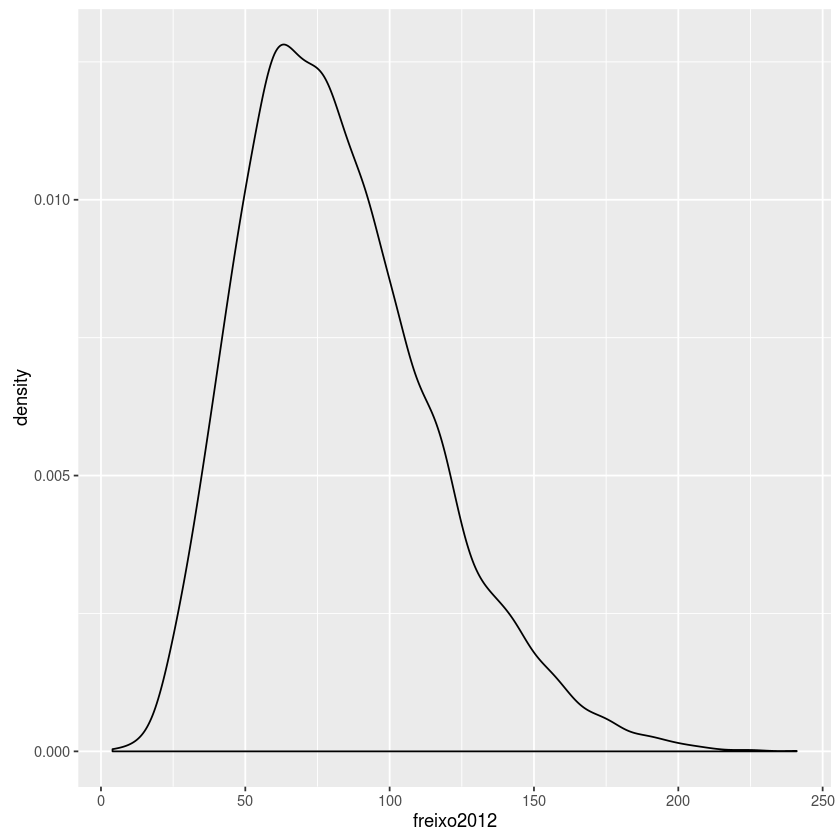

In [6]:
ggplot(data_vereadores_cor, aes(freixo2012))+geom_density()

In [7]:
str(data_vereadores_cor)

'data.frame':	11144 obs. of  27 variables:
 $ sferraz_12          : num  1 1 3 2 1 1 2 1 1 1 ...
 $ freixo2012          : int  39 70 70 56 71 79 77 78 57 48 ...
 $ wagnermontes_12     : num  1 3 2 5 0 5 2 3 3 1 ...
 $ juniordalucinha_12  : num  0 0 1 1 0 0 0 0 0 0 ...
 $ jorgefelipe_12      : num  0 1 3 1 0 0 0 1 3 0 ...
 $ cesarmaia_12        : num  4 9 6 6 8 7 5 7 7 3 ...
 $ leonelbrizola_12    : num  2 5 4 1 3 1 4 2 7 4 ...
 $ rafaelfreitas_12    : num  1 1 0 0 3 2 1 0 1 0 ...
 $ cristianebrasil_12  : num  2 4 1 1 1 3 4 1 1 0 ...
 $ marcelinodalmeida_12: num  0 1 0 0 0 0 0 0 0 0 ...
 $ taniabastos_12      : num  4 1 1 0 1 0 1 0 3 0 ...
 $ alexandreisqueiro_12: num  0 3 1 2 0 2 5 1 2 1 ...
 $ veralins_12         : num  2 1 0 1 2 2 4 3 1 2 ...
 $ rosafernardes_12    : num  2 0 0 2 6 3 2 2 4 1 ...
 $ guarana_12          : num  4 4 2 2 3 8 4 4 6 5 ...
 $ jairinho_12         : num  0 2 1 0 0 1 1 1 0 0 ...
 $ jorgebraz_12        : num  1 1 1 1 4 2 2 0 0 2 ...
 $ drcarloseduardo_12  : num 

In [ ]:
#########
CORPPLOTS
#########

In [8]:
vcor <- cor(data_vereadores_cor)

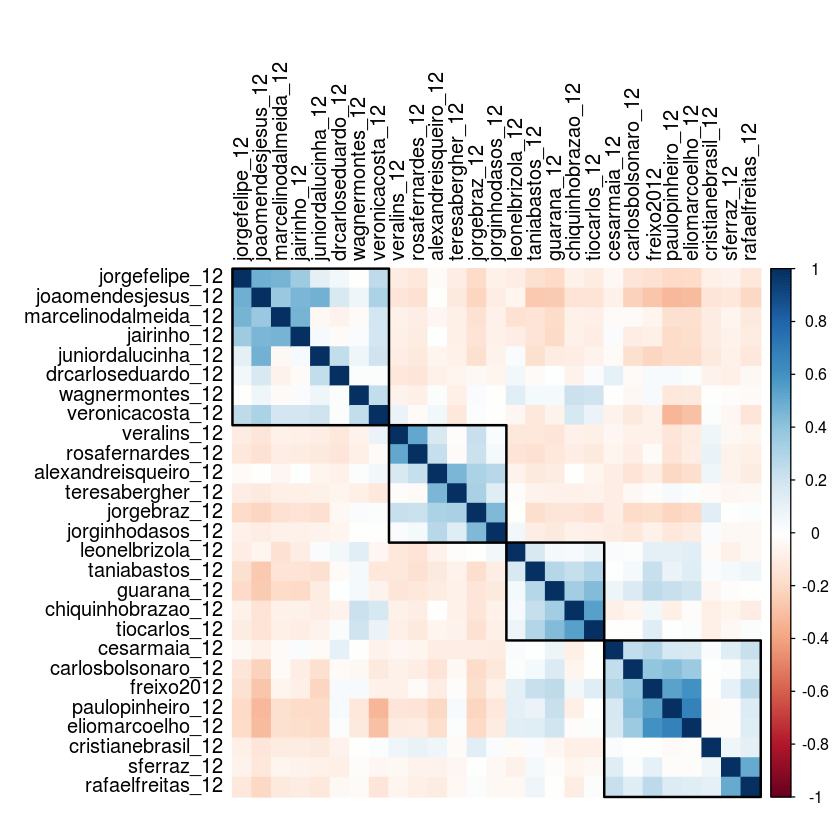

In [9]:
corrplot(vcor, method = "color", tl.col="black", order = "hclust", addrect=4)

In [25]:
names(vcor[2,-2])
vcor[2,-2]

[1] "sferraz_12"           "wagnermontes_12"      "juniordalucinha_12"  
 [4] "jorgefelipe_12"       "cesarmaia_12"         "leonelbrizola_12"    
 [7] "rafaelfreitas_12"     "cristianebrasil_12"   "marcelinodalmeida_12"
[10] "taniabastos_12"       "alexandreisqueiro_12" "veralins_12"         
[13] "rosafernardes_12"     "guarana_12"           "jairinho_12"         
[16] "jorgebraz_12"         "drcarloseduardo_12"   "veronicacosta_12"    
[19] "joaomendesjesus_12"   "paulopinheiro_12"     "chiquinhobrazao_12"  
[22] "teresabergher_12"     "eliomarcoelho_12"     "jorginhodasos_12"    
[25] "tiocarlos_12"         "carlosbolsonaro_12"

sferraz_12      wagnermontes_12   juniordalucinha_12 
        0.1075972944         0.0319296760        -0.2163347394 
      jorgefelipe_12         cesarmaia_12     leonelbrizola_12 
       -0.1541692436         0.2933557329         0.1178799764 
    rafaelfreitas_12   cristianebrasil_12 marcelinodalmeida_12 
        0.2680248520        -0.0006266777        -0.0557294204 
      taniabastos_12 alexandreisqueiro_12          veralins_12 
        0.2255660312        -0.0959619311        -0.0717222855 
    rosafernardes_12           guarana_12          jairinho_12 
       -0.0262724919         0.2565742830        -0.0883159918 
        jorgebraz_12   drcarloseduardo_12     veronicacosta_12 
       -0.1743408569         0.0357789457        -0.0774310483 
  joaomendesjesus_12     paulopinheiro_12   chiquinhobrazao_12 
       -0.2742350719         0.5306466627         0.0523699068 
    teresabergher_12     eliomarcoelho_12     jorginhodasos_12 
       -0.0180017104         0.6031863282        -0.0706906545 
        tiocarlos_12   carlosbolsonaro_12 
        0.1318120150         0.3964686491

In [10]:
data_freixo_cor <- data.frame(
  vereadores=character(length(vcor[2,-2])),
  correlation=numeric(length(vcor[2,-2])),
  stringsAsFactors = FALSE, row.names=NULL  )

data_freixo_cor$vereadores <- names(vcor[2,-2])
data_freixo_cor$correlation <- vcor[2,-2]



Warning message:
: Stacking not well defined when ymin != 0

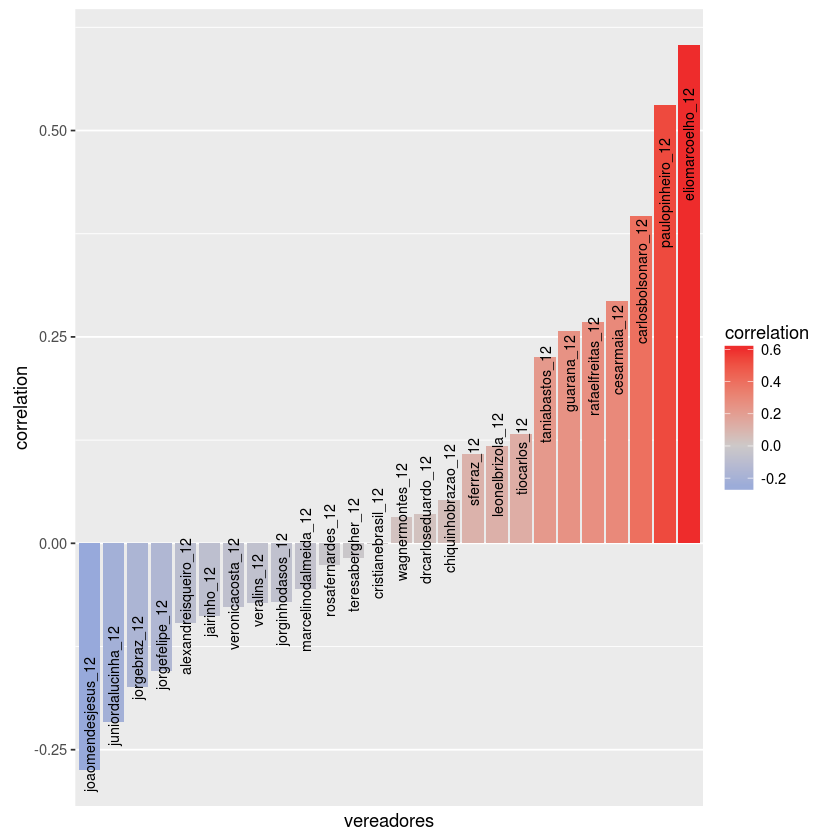

In [11]:

ggplot(data_freixo_cor, aes(x=reorder(vereadores, correlation), y=correlation, fill=correlation, label=vereadores))+geom_bar(stat="identity")+
  scale_fill_gradient2(low='dodgerblue2', mid='snow3', high='firebrick2', space='Lab') + 
    geom_text(angle=90, aes(y=correlation*0.8), size=3) + scale_x_discrete(breaks=NULL) +xlab("vereadores")

In [ ]:
############################################################################################# 

In [12]:
#load data
data_vereadores_zona <- read.csv(file="data_vereadores_zona.csv", head=TRUE, sep=",")
str(data_vereadores_zona)

'data.frame':	97 obs. of  28 variables:
 $ sferraz_12          : num  33 60 37 33 31 ...
 $ freixo2012          : int  4552 9049 12252 15079 9005 9049 21415 7591 24156 9737 ...
 $ wagnermontes_12     : num  193 355 96 138 165 113 285 356 452 293 ...
 $ juniordalucinha_12  : num  19 39 12 15 14 10 22 32 64 48 ...
 $ jorgefelipe_12      : num  66 152 87 112 68 100 167 145 291 195 ...
 $ cesarmaia_12        : num  331 832 463 475 469 ...
 $ leonelbrizola_12    : num  242 287 484 316 249 140 345 307 430 132 ...
 $ rafaelfreitas_12    : num  89 112 112 205 258 ...
 $ cristianebrasil_12  : num  136 219 209 277 219 159 424 285 285 775 ...
 $ marcelinodalmeida_12: num  14 32 3 18 13 12 24 29 75 46 ...
 $ taniabastos_12      : num  55 74 201 385 214 185 364 193 810 484 ...
 $ alexandreisqueiro_12: num  149 434 96 89 110 102 213 413 517 261 ...
 $ veralins_12         : num  61 97 47 54 72 49 122 78 121 329 ...
 $ rosafernardes_12    : num  103 185 78 104 83 82 215 154 291 206 ...
 $ guarana_12  

In [13]:
data_vereadores_zona <- melt(data_vereadores_zona, id.vars = "zona")
str(data_vereadores_zona)

'data.frame':	2619 obs. of  3 variables:
 $ zona    : num  1 2 3 4 5 6 7 8 9 10 ...
 $ variable: Factor w/ 27 levels "sferraz_12","freixo2012",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : num  33 60 37 33 31 ...


In [14]:
data_vereadores_zona

,zona,variable,value
1,1,sferraz_12,33
2,2,sferraz_12,60
3,3,sferraz_12,37
4,4,sferraz_12,33
5,5,sferraz_12,31
6,6,sferraz_12,72
7,7,sferraz_12,116
8,8,sferraz_12,915
9,9,sferraz_12,85
10,10,sferraz_12,4763


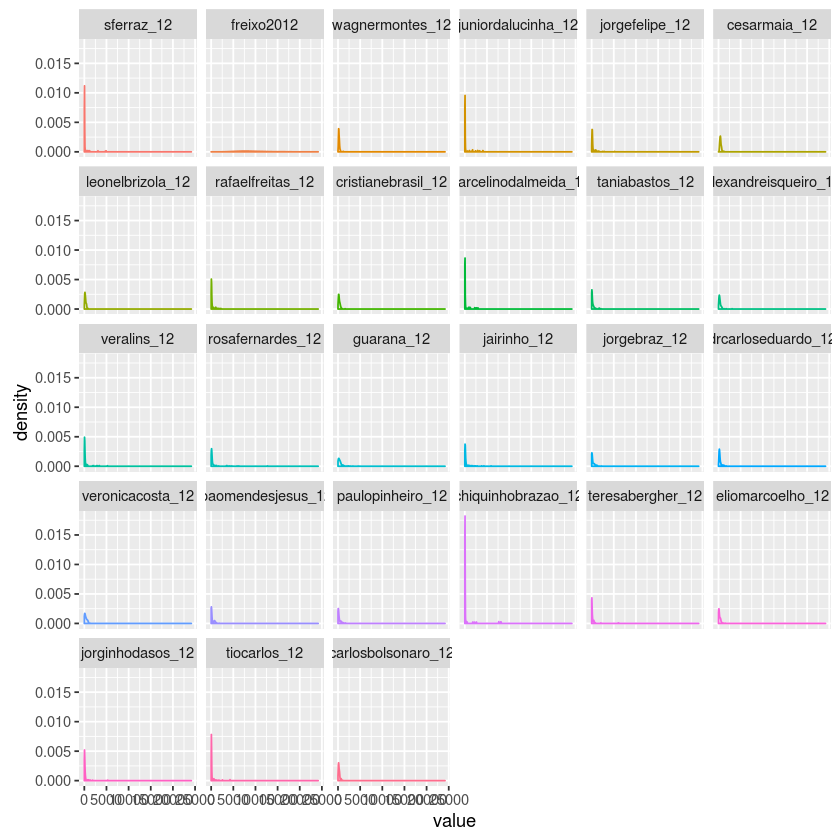

In [31]:
ggplot(data_vereadores_zona,aes(value, colour=variable))+geom_density()+ facet_wrap(~variable)+ theme(legend.position="none")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


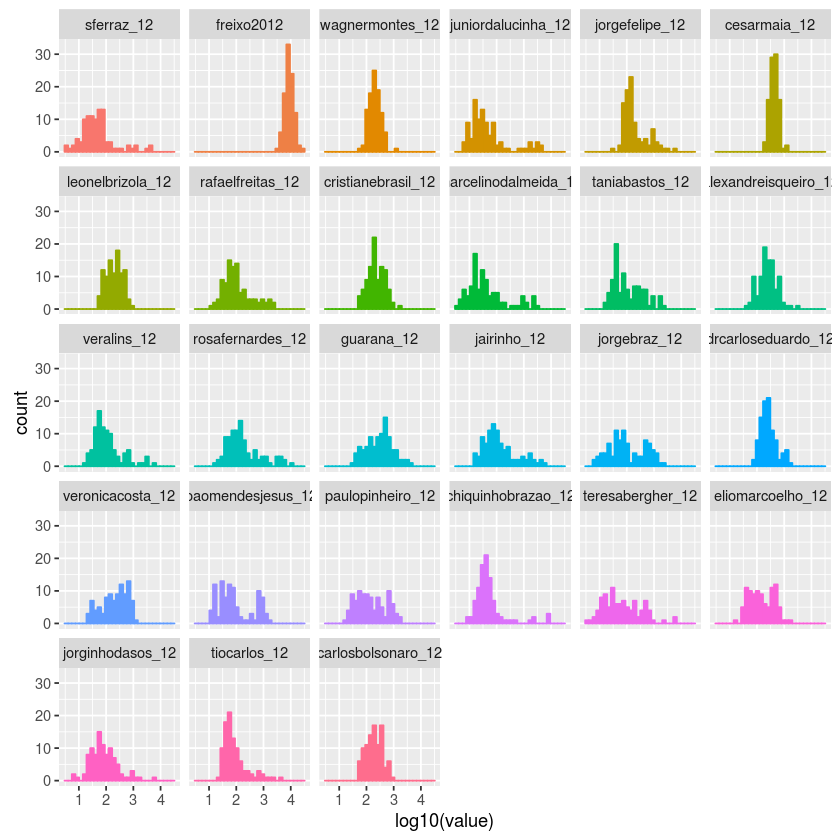

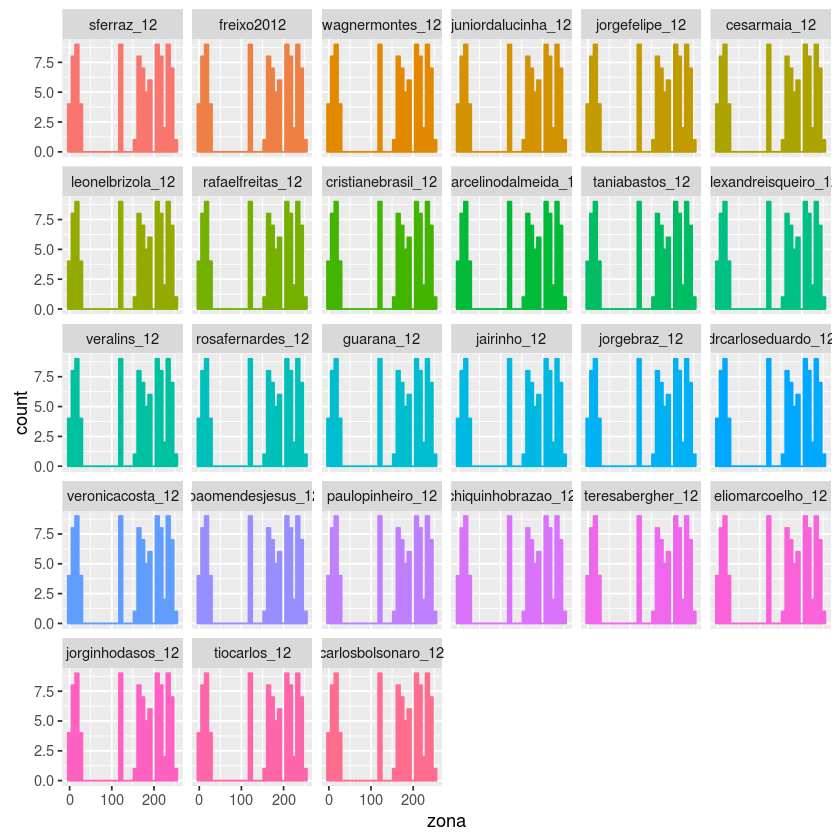

In [21]:
#ggplot(data_vereadores_zona,aes(log10(value), colour=variable))+geom_density()+ facet_wrap(~variable)+ theme(legend.position="none")

ggplot(data_vereadores_zona,aes(log10(value), colour=variable))+geom_histogram(aes(stat="identity", fill=variable))+ facet_wrap(~variable)+ theme(legend.position="none")
ggplot(data_vereadores_zona,aes(zona, colour=variable))+geom_histogram(aes(stat="identity", fill=variable))+ facet_wrap(~variable)+ theme(legend.position="none")



In [43]:
#mapa


In [44]:
zona_secao_local

,zona,secao,local,id_municipio,municipio,bairro,endereco,cep,nome_local,end_completo,latitude,longitude,total_secao,total_local
1,1,15,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,166,2322
2,1,16,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,169,2322
3,1,17,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,169,2322
4,1,22,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,170,2322
5,1,37,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,274,2322
6,1,38,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,417,2322
7,1,73,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,414,2322
8,1,92,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,129,2322
9,1,201,1015,60011,RIO DE JANEIRO,SAUDE,RUA EDGARD GORDILHO 63,20081070,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,"RUA EDGARD GORDILHO 63,SAUDE,20081070,RIO DE JANEIRO",-22.897077,-43.183952,414,2322
10,1,4,1031,60011,RIO DE JANEIRO,CENTRO,RUA DA IMPRENSA 16,20030013,PALACIO GUSTAVO CAPANEMA (ANTIGO MINISTERIO DA EDUCACAO),"RUA DA IMPRENSA 16,CENTRO,20030013,RIO DE JANEIRO",-22.908841,-43.173664,221,1525


In [71]:
locais_unique <- subset(zona_secao_local[,c(3,6,7,9,11,12)], !duplicated(local))
locais <- subset(zona_secao_local[,c(3,6,7,9,11,12,14)])

In [72]:
b <- aggregate(zona_secao_local$total_secao, by=list(zona_secao_local$local), FUN=sum)
names(b)[1] <- "local"
names(b)[2] <- "total_local"
str(b)


'data.frame':	126 obs. of  2 variables:
 $ local      : int  1015 1023 1031 1040 1058 1066 1074 1082 1090 1104 ...
 $ total_local: int  198461 212336 219250 205063 183626 225975 193628 200642 186645 168269 ...


In [30]:
str(locais)

'data.frame':	11585 obs. of  7 variables:
 $ local      : int  1015 1015 1015 1015 1015 1015 1015 1015 1015 1031 ...
 $ bairro     : Factor w/ 158 levels "ABOLICAO","ACARI",..: 131 131 131 131 131 131 131 131 131 32 ...
 $ endereco   : Factor w/ 1445 levels "ATERRO MARE I",..: 874 874 874 874 874 874 874 874 874 775 ...
 $ nome_local : Factor w/ 1408 levels "1A IGREJA BATISTA DA PIEDADE",..: 1105 1105 1105 1105 1105 1105 1105 1105 1105 1335 ...
 $ latitude   : num  -22.9 -22.9 -22.9 -22.9 -22.9 ...
 $ longitude  : num  -43.2 -43.2 -43.2 -43.2 -43.2 ...
 $ total_local: int  2322 2322 2322 2322 2322 2322 2322 2322 2322 1525 ...


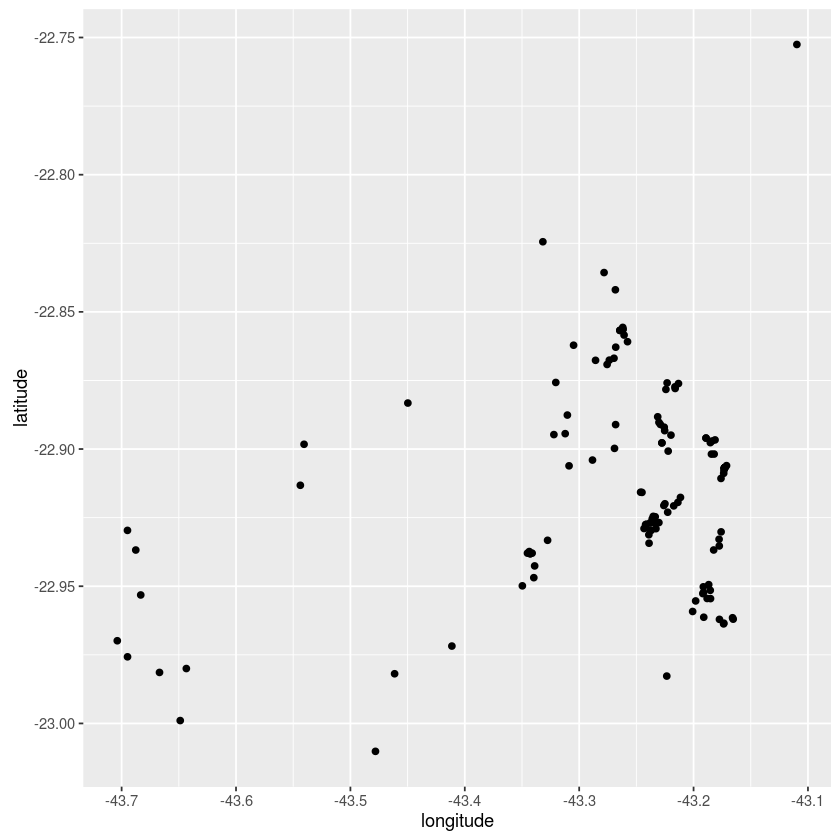

In [38]:
ggplot(locais, aes(longitude,latitude))+geom_point()


In [36]:
str(a)

'data.frame':	11144 obs. of  35 variables:
 $ zona                : int  10 10 10 10 10 10 10 10 10 10 ...
 $ secao               : int  10 100 101 102 103 104 11 117 118 119 ...
 $ local               : int  1040 1309 1309 1317 1317 1317 1040 1376 1376 1376 ...
 $ bairro              : Factor w/ 158 levels "ABOLICAO","ACARI",..: 4 109 109 109 109 109 4 109 109 109 ...
 $ latitude            : num  -22.9 -22.9 -22.9 -22.9 -22.9 ...
 $ longitude           : num  -43.3 -43.3 -43.3 -43.3 -43.3 ...
 $ total_secao         : int  455 492 491 322 429 430 386 319 458 461 ...
 $ total_local         : int  3566 4816 4816 1611 1611 1611 3566 2054 2054 2054 ...
 $ sferraz_12          : num  46 42 33 10 24 24 43 18 25 37 ...
 $ freixo2012          : int  89 95 93 51 79 89 92 64 109 88 ...
 $ wagnermontes_12     : num  0 3 2 3 2 7 4 2 2 4 ...
 $ juniordalucinha_12  : num  0 1 0 1 1 2 1 0 0 1 ...
 $ jorgefelipe_12      : num  3 2 6 1 2 4 3 2 3 0 ...
 $ cesarmaia_12        : num  8 3 5 5 3 4 5 2 6 5 .

In [33]:
aa <- a[,c(3,9:ncol(a))]

In [40]:
str(aa)

'data.frame':	11144 obs. of  28 variables:
 $ local               : int  1040 1309 1309 1317 1317 1317 1040 1376 1376 1376 ...
 $ sferraz_12          : num  46 42 33 10 24 24 43 18 25 37 ...
 $ freixo2012          : int  89 95 93 51 79 89 92 64 109 88 ...
 $ wagnermontes_12     : num  0 3 2 3 2 7 4 2 2 4 ...
 $ juniordalucinha_12  : num  0 1 0 1 1 2 1 0 0 1 ...
 $ jorgefelipe_12      : num  3 2 6 1 2 4 3 2 3 0 ...
 $ cesarmaia_12        : num  8 3 5 5 3 4 5 2 6 5 ...
 $ leonelbrizola_12    : num  2 1 0 0 3 1 1 1 1 0 ...
 $ rafaelfreitas_12    : num  16 15 19 10 16 13 9 9 20 11 ...
 $ cristianebrasil_12  : num  2 4 9 1 0 1 1 1 5 4 ...
 $ marcelinodalmeida_12: num  0 2 1 0 0 0 0 0 0 0 ...
 $ taniabastos_12      : num  1 7 4 3 3 6 3 5 4 11 ...
 $ alexandreisqueiro_12: num  3 5 3 0 1 4 0 1 4 6 ...
 $ veralins_12         : num  2 1 2 2 1 4 2 1 2 3 ...
 $ rosafernardes_12    : num  1 2 3 2 1 2 2 0 2 3 ...
 $ guarana_12          : num  2 1 3 1 1 3 5 4 3 2 ...
 $ jairinho_12         : num  0 0

In [ ]:
 <- aggregate(aa$)

In [49]:
votovereadores_local <- ddply(aa,~local,summarise,freixo2012=sum(freixo2012),
                                 sferraz_12=sum(sferraz_12),
                                 wagnermontes_12=sum(wagnermontes_12),
                                 juniordalucinha_12=sum(juniordalucinha_12),
                                 jorgefelipe_12=sum(jorgefelipe_12),
                                 cesarmaia_12=sum(cesarmaia_12),
                                 leonelbrizola_12=sum(leonelbrizola_12),
                                 rafaelfreitas_12=sum(rafaelfreitas_12),
                                 cristianebrasil_12=sum(cristianebrasil_12),
                                 marcelinodalmeida_12=sum(marcelinodalmeida_12),
                                 taniabastos_12=sum(taniabastos_12),
                                 alexandreisqueiro_12=sum(alexandreisqueiro_12),
                                 veralins_12=sum(veralins_12),
                                 rosafernardes_12=sum(rosafernardes_12),
                                 guarana_12=sum(guarana_12),
                                 jairinho_12=sum(jairinho_12),
                                 jorgebraz_12=sum(jorgebraz_12),
                                 drcarloseduardo_12=sum(drcarloseduardo_12),
                                 veronicacosta_12=sum(veronicacosta_12),
                                 joaomendesjesus_12=sum(joaomendesjesus_12),
                                 paulopinheiro_12=sum(paulopinheiro_12),
                                 chiquinhobrazao_12=sum(chiquinhobrazao_12),
                                 teresabergher_12=sum(teresabergher_12),
                                 eliomarcoelho_12=sum(eliomarcoelho_12),
                                 jorginhodasos_12=sum(jorginhodasos_12),
                                 tiocarlos_12=sum(tiocarlos_12),
                                 carlosbolsonaro_12=sum(carlosbolsonaro_12))


In [51]:
str(votovereadores_local)
str(locais)

'data.frame':	124 obs. of  28 variables:
 $ local               : int  1015 1023 1031 1040 1058 1066 1074 1082 1090 1104 ...
 $ freixo2012          : int  36511 37653 38629 36978 34455 39407 34620 36931 33760 33354 ...
 $ sferraz_12          : num  564 443 601 1312 567 ...
 $ wagnermontes_12     : num  1001 897 1084 920 764 ...
 $ juniordalucinha_12  : num  1429 1340 1330 1449 974 ...
 $ jorgefelipe_12      : num  1622 1841 1851 2271 1787 ...
 $ cesarmaia_12        : num  1891 2020 1915 1864 1796 ...
 $ leonelbrizola_12    : num  892 994 1044 1014 989 ...
 $ rafaelfreitas_12    : num  968 1288 936 943 623 ...
 $ cristianebrasil_12  : num  1033 1223 1244 1185 1095 ...
 $ marcelinodalmeida_12: num  1410 1867 1303 1428 1549 ...
 $ taniabastos_12      : num  921 1060 985 798 1178 ...
 $ alexandreisqueiro_12: num  1325 1515 1599 1436 1160 ...
 $ veralins_12         : num  981 1374 2240 1176 916 ...
 $ rosafernardes_12    : num  1833 2336 3080 2954 2125 ...
 $ guarana_12          : num  2557

In [70]:
str(locais_unique)

'data.frame':	126 obs. of  7 variables:
 $ local      : int  1015 1031 1040 1104 1163 1171 1180 1198 1201 1252 ...
 $ bairro     : Factor w/ 158 levels "ABOLICAO","ACARI",..: 131 32 32 32 32 100 131 32 3 131 ...
 $ endereco   : Factor w/ 1445 levels "ATERRO MARE I",..: 874 775 225 1307 427 1221 1375 233 768 1375 ...
 $ nome_local : Factor w/ 1408 levels "1A IGREJA BATISTA DA PIEDADE",..: 1105 1335 1328 1267 84 901 1211 8 847 812 ...
 $ latitude   : num  -22.9 -22.9 -22.9 -22.9 -22.9 ...
 $ longitude  : num  -43.2 -43.2 -43.2 -43.2 -43.2 ...
 $ total_local: int  2322 1525 2507 1219 1909 3118 2743 3136 3371 2220 ...


In [73]:
###merge##
votovereadores_local_geo <- merge(locais_unique, votovereadores_local, by=c("local")) 
votovereadores_local_geo <- merge(votovereadores_local_geo, b, by=c("local")) 

In [75]:
sum(votovereadores_local_geo$total_local)
str(votovereadores_local_geo)
write.csv(votovereadores_local_geo, file = "votovereadores_local_geo.csv")

[1] 4835110

'data.frame':	124 obs. of  34 variables:
 $ local               : int  1015 1023 1031 1040 1058 1066 1074 1082 1090 1104 ...
 $ bairro              : Factor w/ 158 levels "ABOLICAO","ACARI",..: 131 138 32 32 19 146 138 19 138 32 ...
 $ endereco            : Factor w/ 1445 levels "ATERRO MARE I",..: 874 988 775 225 1317 495 991 793 986 1307 ...
 $ nome_local          : Factor w/ 1408 levels "1A IGREJA BATISTA DA PIEDADE",..: 1105 12 1335 1328 88 584 260 381 960 1267 ...
 $ latitude            : num  -22.9 -22.9 -22.9 -22.9 -22.9 ...
 $ longitude           : num  -43.2 -43.2 -43.2 -43.2 -43.2 ...
 $ freixo2012          : int  36511 37653 38629 36978 34455 39407 34620 36931 33760 33354 ...
 $ sferraz_12          : num  564 443 601 1312 567 ...
 $ wagnermontes_12     : num  1001 897 1084 920 764 ...
 $ juniordalucinha_12  : num  1429 1340 1330 1449 974 ...
 $ jorgefelipe_12      : num  1622 1841 1851 2271 1787 ...
 $ cesarmaia_12        : num  1891 2020 1915 1864 1796 ...
 $ leonelbrizola_